In [42]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, make_scorer,f1_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [20]:
df = pd.read_csv('irisdata.csv' ,names=['sepal length','sepal width','petal length','petal width' , 'class'])

In [21]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## to check the data types of the columns and null values  of each one 

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [23]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [24]:
# lest's took a look at the number of instances for each calss  
print(df.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


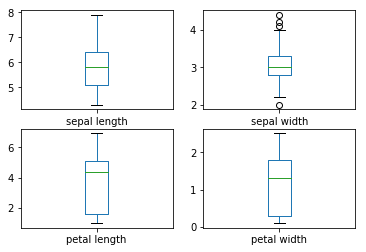

In [25]:
# let's discover each column to show the values and outliers if found 
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

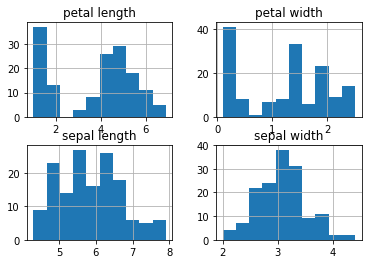

In [27]:
df.hist()
plt.show()

## find the correlation between  numeric columns 

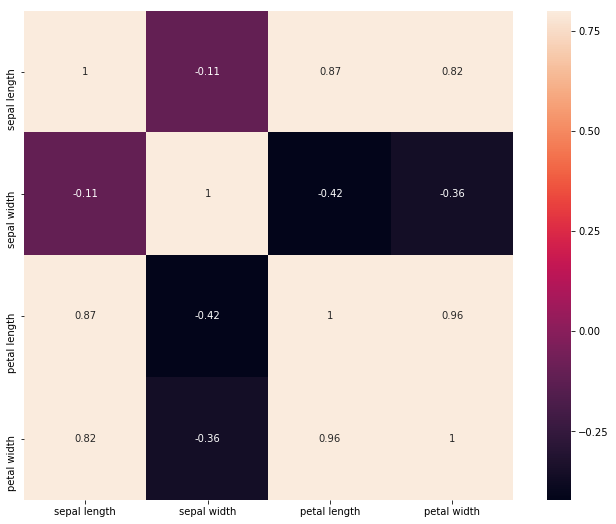

In [36]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, cbar=True, annot=True, square=True, vmax=.8);

In [ ]:
# we found the most correlated features ( petal width , petal length) , ( petal width , sepal length)

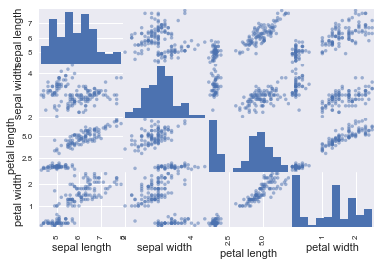

In [41]:
# scatter plot matrix
scatter_matrix(df)
plt.show()

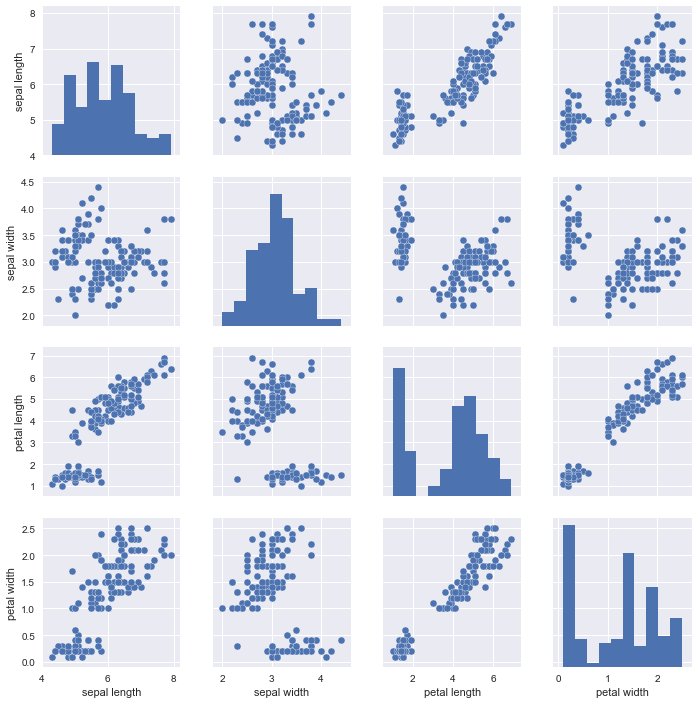

In [39]:
sns.set()
cols = ['sepal length','sepal width','petal length','petal width']
sns.pairplot(df[cols], size = 2.5)
plt.show();

# identify the X and Y from the dataset to build the model 

In [43]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [49]:
from sklearn.metrics import confusion_matrix

# logistic regression

In [45]:
lr = LogisticRegression()
lr.fit(X_train ,y_train )
lr.score(X_train ,y_train)

0.95

In [46]:
y_pred = lr.predict(X_test)
print (classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        16

    avg / total       1.00      1.00      1.00        50



In [47]:
#random forest 
rf = RandomForestClassifier( n_estimators=5)
rf.fit(X_train ,y_train )
rf.score(X_train ,y_train)

0.99

In [48]:
y_pred = rf.predict(X_test)
print (classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.94      0.97        16

    avg / total       0.98      0.98      0.98        50



In [50]:
confusion_matrix(y_test, y_pred)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]], dtype=int64)

# try the K neighrest kneighbors

In [58]:
# K neighrest kneighbors
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train ,y_train )
knn.score(X_train ,y_train)

0.96

In [59]:
y_pred = knn.predict(X_test)
print (classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.94      0.97        16

    avg / total       0.98      0.98      0.98        50



In [60]:
confusion_matrix(y_test, y_pred)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]], dtype=int64)

## try the Decision Tree

In [54]:
#decision tree
dt=DecisionTreeClassifier()
dt.fit(X_train ,y_train )
dt.score(X_train ,y_train)

1.0

In [56]:
y_pred = dt.predict(X_test)
print (classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.94      0.97        16

    avg / total       0.98      0.98      0.98        50



In [57]:
confusion_matrix(y_test, y_pred)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]], dtype=int64)

## support vector machine 

In [61]:
from sklearn.svm import SVC

In [64]:
svc = SVC(kernel = 'rbf' , random_state=0 )

In [65]:
svc.fit(X_train ,y_train )
svc.score(X_train ,y_train)

0.98

In [66]:
confusion_matrix(y_test, y_pred)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]], dtype=int64)